In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline


In [10]:
#DATA preprocessing
#Load dataset
x_data = pd.read_csv(r'C:\Users\chongs\BDANALYSIS\furnace_bd.csv')
x_data = x_data.iloc[:,2:]
#epoch time 수정
x_data['3'] = x_data['3'].astype(str).str[:-3].astype(np.int64)
x_data['3'] = x_data['3'].astype(str).str[4:].astype(np.int64)
#구간 선택
x_data = x_data[x_data['3'].values > 890472]
x_data = x_data[x_data['3'].values < 901000]
#pivot table 사용 query 진행
x_data = x_data.pivot_table(index = x_data['3'],columns = x_data['1'])
#dataframe 재설정
x_data = x_data['2'][['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16', 'temp_zone7_4', 'temp_zone7_6', 'temp_zone7_8', 'temp_zone7_top', 'temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31', 'temp_zone8_33', 'temp_zone8_35', 'temp_zone8_37', 'temp_zone8_top']]
x_data = x_data.interpolate()

y_data = pd.read_csv(r"C:\Users\chongs\BDANALYSIS\14_Gls_org.csv", engine = 'python', index_col = False)
#원하는 columns 선택

y_data['time'] = y_data['날짜'] + ' ' + y_data['시간']

#시간 delay 수정 및 epoch 시간으로 convert
total_delay = dt.timedelta(minutes = 8, seconds=5)

y_data['time']=(pd.to_datetime(y_data['time']) + total_delay).apply(dt.datetime.timestamp).astype(np.int64)
y_data['time'] = y_data['time'].astype(str).str[4:].astype(np.int64)

y_data = y_data[['time','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]

y_data.set_index('time', inplace = True)


# X, Y data의 index를 y_data의 인덱스에 맞춰 Join 실행(NaN 값 : drop)
xy = pd.concat([x_data, y_data], axis=1, join='inner', join_axes = [x_data.index] )
xy.dropna(inplace=True)

#x,y값 재추출
x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
       'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
       'temp_zone8_33', 'temp_zone8_35']]
y = xy[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]

# Train / Test set 나누기
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)

In [36]:
# MultiOutput regressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

mor = MultiOutputRegressor(RandomForestRegressor(n_estimators = 10, random_state = 0,min_impurity_decrease=0.001))
mor.fit(X_train, y_train)

#결정계수 r2 score 계싼
from sklearn.metrics import r2_score
y_train_pred_mor = mor.predict(X_train)
y_test_pred_mor = mor.predict(X_test)

r2_train_mor = r2_score(y_train, y_train_pred_mor)
r2_test_mor = r2_score(y_test, y_test_pred_mor)

print('R2 - Train : %.3f, Test: %.3f' %(r2_train_mor, r2_test_mor))

from sklearn import metrics


from sklearn.metrics import explained_variance_score

# print('Explain_variance_score:', explained_variance_score(y_test, y_test_pred_mor))  
print('Explain_variance_score - uniform_average:', explained_variance_score(y_test, y_test_pred_mor,multioutput='uniform_average'))  
# print('Explain_variance_score - multi:', explained_variance_score(y_test, y_test_pred_mor,multioutput='raw_values'))  
print('Explain_variance_score - variance_weighted:', explained_variance_score(y_test, y_test_pred_mor,multioutput='variance_weighted'))  


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_mor))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_mor))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_mor)))  

R2 - Train : 0.920, Test: 0.867
Explain_variance_score - uniform_average: 0.8673438575977439
Explain_variance_score - variance_weighted: 0.8928133238040983
Mean Absolute Error: 0.09356463710586237
Mean Squared Error: 0.0175403239930312


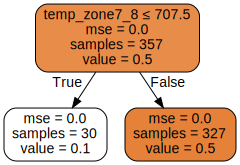

In [37]:
from sklearn import tree
import graphviz 
estimator = mor.estimators_[1][1]
dot_data = tree.export_graphviz(estimator, out_file=None) 
graph = graphviz.Source(dot_data)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

dot_data = tree.export_graphviz(estimator, out_file=None, 
                         feature_names=np.array(X_train.columns),  
                         class_names=np.array(y_train.columns),  
                         filled=True, rounded=True,  
                         special_characters=True, precision = 1)  

graph = graphviz.Source(dot_data)  
graph.render('tree2')
graph

In [38]:
#DATA preprocessing
#Load dataset
x_data = pd.read_csv(r'C:\Users\chongs\BDANALYSIS\furnace_BD_1030.csv')
x_data = x_data.iloc[:,2:]
#epoch time 수정
x_data['3'] = x_data['3'].astype(str).str[:-3].astype(np.int64)
x_data['3'] = x_data['3'].astype(str).str[4:].astype(np.int64)
# #구간 선택
# x_data = x_data[x_data['3'].values > 890472]
# x_data = x_data[x_data['3'].values < 901000]
#pivot table 사용 query 진행
x_data = x_data.pivot_table(index = x_data['3'],columns = x_data['1'])
#dataframe 재설정
x_data = x_data['2'][['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16', 'temp_zone7_4', 'temp_zone7_6', 'temp_zone7_8', 'temp_zone7_top', 'temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31', 'temp_zone8_33', 'temp_zone8_35', 'temp_zone8_37', 'temp_zone8_top']]
x_data = x_data.interpolate()

y_data = pd.read_csv(r"C:\Users\chongs\BDANALYSIS\test_set.csv", engine = 'python', index_col = False)
#원하는 columns 선택

y_data['time'] = y_data['날짜'] + ' ' + y_data['시간']

#시간 delay 수정 및 epoch 시간으로 convert
total_delay = dt.timedelta(minutes = 8, seconds=5)

y_data['time']=(pd.to_datetime(y_data['time']) + total_delay).apply(dt.datetime.timestamp).astype(np.int64)
y_data['time'] = y_data['time'].astype(str).str[4:].astype(np.int64)

y_data = y_data[['time','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]

y_data.set_index('time', inplace = True)


# X, Y data의 index를 y_data의 인덱스에 맞춰 Join 실행(NaN 값 : drop)
xy = pd.concat([x_data, y_data], axis=1, join='inner', join_axes = [x_data.index] )
xy.dropna(inplace=True)

#x,y값 재추출
x = xy[['temp_zone7_10', 'temp_zone7_12', 'temp_zone7_14', 'temp_zone7_16',
       'temp_zone7_6', 'temp_zone7_8','temp_zone8_25', 'temp_zone8_27', 'temp_zone8_29', 'temp_zone8_31',
       'temp_zone8_33', 'temp_zone8_35']]
y = xy[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J','K', 'L', 'M', 'N', 'O']]


In [39]:
from sklearn.metrics import r2_score
prediction = mor.predict(x)

r2_test_set = r2_score(y, prediction)

print('R2 : %.3f, Test: %.3f' %(r2_test_set, r2_test_mor))


R2 : -0.422, Test: 0.867
